In [1]:
import warnings, os, pandas as pd, requests, json
from datetime import datetime
warnings.filterwarnings("ignore", category=DeprecationWarning, module=".*")

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Libre Franklin'
mpl.rcParams['figure.dpi'] = 200

We will only use 2000 onwards. For data of 2017 onwards, it is through an API since it is still for an update at a given time.

In [3]:
# Dataset IDs so we won't be downloading it repetitively for updated versions

# data_1990 = "d_ebc5ab87086db484f88045b47411ebc5"
# data_2000 = "d_43f493c6c50d54243cc1eab0df142d6a"
# data_2012 = "d_2d5ff9ea31397b66239f245f57751537"
# data_2015 = "d_ea9ed51da2787afaf8e51f827c304208"
# data_2017 = "d_8b84c4ee58e3cfc0ece0d773c8ca6abc"

In [4]:
folder_path = '../data/'

csv_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

dfs = []
for file in csv_list:
    try:
        df = pd.read_csv(file, on_bad_lines='skip', sep=None, engine='python')  # Let pandas guess separator
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

df = pd.concat(dfs, ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
664396,2025-02,YISHUN,EXECUTIVE,723,YISHUN ST 71,07 TO 09,146.0,Maisonette,1986,818888.0,60 years 05 months
664397,2025-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,960000.0,62 years 02 months
664398,2025-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,145.0,Apartment,1987,868888.0,61 years 10 months
664399,2025-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1100888.0,62 years


In [5]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        421854
dtype: int64

In [6]:
# s = requests.Session()
# s.headers.update({'referer': 'https://colab.research.google.com'})
# base_url = "https://api-production.data.gov.sg"
# url = base_url + f"/v2/public/api/datasets/{data_2017}/metadata"
# print(url)
# response = s.get(url)
# data = response.json()['data']
# columnMetadata = data.pop('columnMetadata', None)

# print("Dataset Metadata:")
# print(json.dumps(data, indent=2))

# print("\nColumns:\n", list(columnMetadata['map'].values()))

In [7]:
# def download_file(DATASET_ID):
#   # initiate download
#   initiate_download_response = s.get(
#       f"https://api-open.data.gov.sg/v1/public/api/datasets/{DATASET_ID}/initiate-download",
#       headers={"Content-Type":"application/json"},
#       json={}
#   )
#   print(initiate_download_response.json()['data']['message'])

#   # poll download
#   MAX_POLLS = 5
#   for i in range(MAX_POLLS):
#     poll_download_response = s.get(
#         f"https://api-open.data.gov.sg/v1/public/api/datasets/{DATASET_ID}/poll-download",
#         headers={"Content-Type":"application/json"},
#         json={}
#     )
#     print("Poll download response:", poll_download_response.json())
#     if "url" in poll_download_response.json()['data']:
#       print(poll_download_response.json()['data']['url'])
#       DOWNLOAD_URL = poll_download_response.json()['data']['url']
#       df = pd.read_csv(DOWNLOAD_URL)

#       display(df.head())
#       print("\nDataframe loaded!")
#       return df
#     if i == MAX_POLLS - 1:
#       print(f"{i+1}/{MAX_POLLS}: No result found, possible error with dataset, please try again or let us know at https://go.gov.sg/datagov-supportform\n")
#     else:
#       print(f"{i+1}/{MAX_POLLS}: No result yet, continuing to poll\n")
#     time.sleep(3)

# df_2017 = download_file(data_2017)

In [8]:
df.drop(columns=['remaining_lease'], inplace=True)

In [9]:
print(df.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')


In [10]:
# # Concatenate dataframes
# df_combined = pd.concat([df, df_2017], ignore_index=True)
# df_combined.reset_index(drop=True, inplace=True)

In [11]:
# Convert month into a datetime object
df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')

# Create a new column with the full month name (e.g., 'January')
# df['month_name'] = df['month'].dt.strftime('%B')

In [12]:
current_year = pd.to_datetime('today').year

# Convert lease_commence_date to datetime format
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')

df['Lease Age'] = current_year - df['lease_commence_date'].dt.year

In [13]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Lease Age
0,2000-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986-01-01,147000.0,39
1,2000-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986-01-01,144000.0,39
2,2000-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01-01,159000.0,49
3,2000-01-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01-01,167000.0,49
4,2000-01-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976-01-01,163000.0,49
...,...,...,...,...,...,...,...,...,...,...,...
664396,2025-02-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,07 TO 09,146.0,Maisonette,1986-01-01,818888.0,39
664397,2025-01-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988-01-01,960000.0,37
664398,2025-02-01,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,145.0,Apartment,1987-01-01,868888.0,38
664399,2025-02-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988-01-01,1100888.0,37


In [14]:
df = df[df['month'] >= pd.to_datetime('2010-01-01 00:00:00')]
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Lease Age
309328,2010-01-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1977-01-01,202000.0,48
309329,2010-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978-01-01,208000.0,47
309330,2010-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1978-01-01,180000.0,47
309331,2010-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1978-01-01,180000.0,47
309332,2010-01-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977-01-01,198000.0,48
...,...,...,...,...,...,...,...,...,...,...,...
664396,2025-02-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,07 TO 09,146.0,Maisonette,1986-01-01,818888.0,39
664397,2025-01-01,YISHUN,EXECUTIVE,836,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988-01-01,960000.0,37
664398,2025-02-01,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,145.0,Apartment,1987-01-01,868888.0,38
664399,2025-02-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988-01-01,1100888.0,37


In [15]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [16]:
import geopandas as gpd

maps = gpd.read_file('../data/singapore/maps/1-region.geojson')
maps

,name,geometry
0,CENTRAL REGION,"MULTIPOLYGON (((103.84875 1.36303, 103.84924 1..."
1,EAST REGION,"MULTIPOLYGON (((103.95322 1.38202, 103.9535 1...."
2,NORTH REGION,"MULTIPOLYGON (((103.77664 1.45145, 103.77673 1..."
3,NORTH-EAST REGION,"MULTIPOLYGON (((103.89715 1.41502, 103.89741 1..."
4,WEST REGION,"MULTIPOLYGON (((103.69729 1.30754, 103.69728 1..."


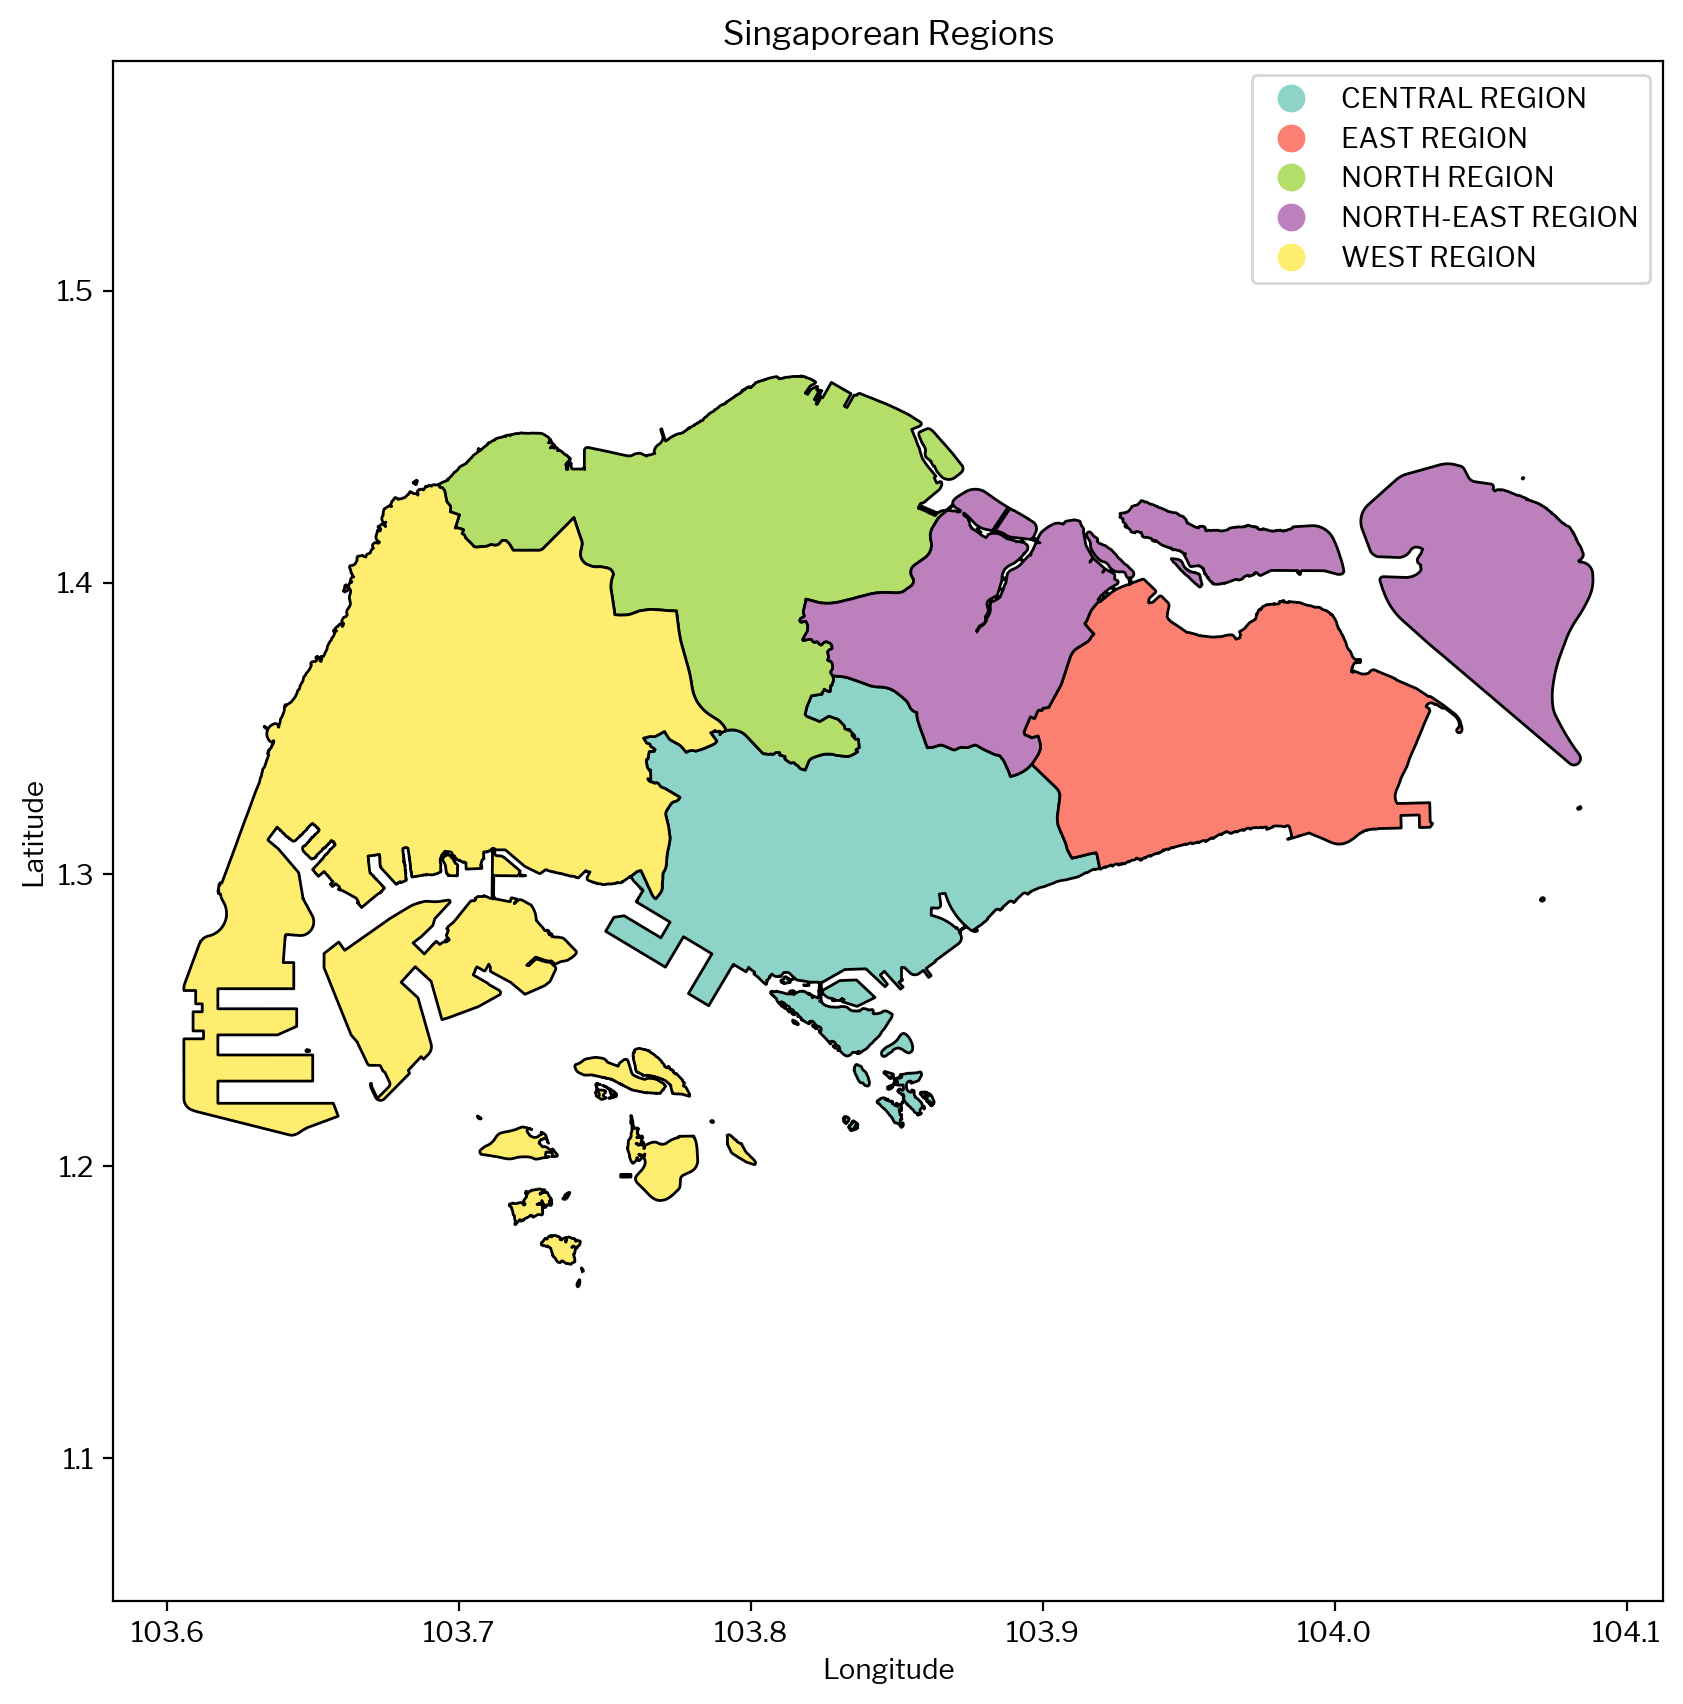

In [17]:
# Visualize the maps using plotly

import matplotlib.pyplot as plt

maps.plot(edgecolor='black', facecolor='lightblue', figsize=(10, 10), column='name', cmap='Set3', legend=True)

plt.title('Singaporean Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')  # keeps aspect ratio correct
plt.show()

In [18]:
df_sg = df.copy()

In [19]:
# Rename all instances of Multi generation into Multi-generation
df_sg['flat_type'] = df_sg['flat_type'].str.replace('MULTI GENERATION', 'MULTI-GENERATION')

In [20]:
region_groups = {
    'CENTRAL REGION': ['BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'NOVENA', 'QUEENSTOWN', 'SOUTHERN ISLANDS', 'TANGLIN', 'TOA PAYOH'],
    'EAST REGION': ['BEDOK', 'CHANGI', 'CHANGI BAY', 'PASIR RIS', 'PAYA LEBAR', 'TAMPINES'],
    'NORTH REGION': ['CENTRAL WATER CATCHMENT', 'LIM CHU KANG', 'MANDAI', 'SEMBAWANG', 'SIMPANG', 'SUNGEI KADUT', 'WOODLANDS', 'YISHUN'],
    'NORTH-EAST REGION': ['ANG MO KIO', 'HOUGANG', 'NORTH-EASTERN ISLANDS', 'PUNGGOL', 'SELETAR', 'SENGKANG', 'SERANGOON'],
    'WEST REGION': ['BOON LAY', 'BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'CLEMENTI', 'JURONG WEST', 'JURONG EAST', 'PIONEER', 'TENGAH', 'TUAS', 'WESTERN ISLANDS', 'WESTERN WATER CATCHMENT']
}

df_sg['region'] = df_sg['town'].apply(lambda x: next((group for group, areas in region_groups.items() if x in areas), 'Other'))

In [21]:
# # Rename 'name' column in maps to 'region' (or 'town', if matching df_sg)
# maps = maps.rename(columns={'name': 'region'})  # adjust if needed

# # Keep only relevant columns
# maps = maps[['region', 'geometry']]

# # Merge with your original DataFrame on 'region'
# df_sg = df_sg.merge(maps, on='region', how='left')
# df_sg

In [22]:
# import modin.pandas as pd 

df_sg.to_csv('../data/processed/sg_hdb_2010_2023.csv', index=False)